# Numpy array methods
> It is nice with methods that can accept both scalar values (int, float) but also array of values (numpy.ndarray). In many cases I write methods that take only scalar values as arguments, so that I need to itterate this method to work an array of arguments. Here I want to explore the best way to turn these scalar methods into array methods.

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [python, numpy, pandas]
- image: images/DEMOPS.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [1]:
#hide
import warnings
warnings.filterwarnings("ignore")

In [2]:
#collapse
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint

## 1D

Let's pretend that I have developed this method

In [15]:
def scalar_method_1D(x):
    
    condition = (x > 100)  # The condition of the if-statement
    value_true = 2*x  # value of y if condition is True
    value_false = x  # value of y if condition is False
    
    if condition:
        y = value_true
    else:
        y = value_false
        
    return y

But this method does not work for an array input:

In [19]:
N = 9
x = np.linspace(0,200,N)
try:
    y=scalar_method_1D(x=x)
except Exception as e:
    print(e)

The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


So in this case we need to do an itteration to get values for an array of x values:

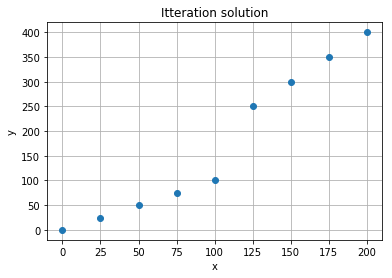

In [24]:
y=[]
for x_ in x:
    y_=scalar_method_1D(x=x_)
    y.append(y_)
    
fig,ax=plt.subplots()
ax.plot(x,y,'o')
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Itteration solution');

Clearly the if-statement is causing some problems here. The problem can be solved reforumlating the method with *np.where(...)*:

In [28]:
def array_method_1D(x):
    
    condition = (x > 100)  # The condition of the if-statement
    value_true = 2*x  # value of y if condition is True
    value_false = x  # value of y if condition is False
    
    y = np.where(condition, value_true, value_false)
           
    return y

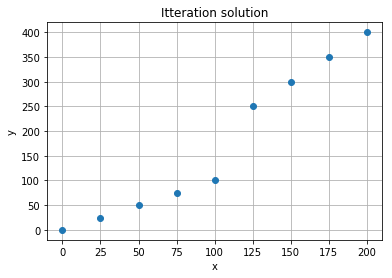

In [29]:
y=array_method_1D(x=x)

fig,ax=plt.subplots()
ax.plot(x,y,'o')
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Itteration solution');

And the array method also works for scalars:

In [31]:
array_method_1D(x=100)

array(100)

## 2D
Another common problem is to make the following method to work with arrays:

In [33]:
def scalar_method_2D(x,y):
    z = x*y
    return z

In [39]:
N = 3
x = np.linspace(0,200,N)
y = np.linspace(0,200,N)
scalar_method_2D(x,y)

array([    0., 10000., 40000.])

But it does not work if the arrays don't have the same length:

In [40]:
x = np.linspace(0,200,N)
y = np.linspace(0,200,N+1)
try:
    scalar_method_2D(x,y)
except Exception as e:
    print(e)

operands could not be broadcast together with shapes (3,) (4,) 


So this one works if *x* and *y* have the same length but sometimes you want this method to work if they have different length also. An of course again you can use itteration:

In [44]:
z=np.zeros((len(x),len(y)))
for i,x_ in enumerate(x):
    for j,y_ in enumerate(y):
        z[i,j] = scalar_method_2D(x_,y_)
z  

array([[    0.        ,     0.        ,     0.        ,     0.        ],
       [    0.        ,  6666.66666667, 13333.33333333, 20000.        ],
       [    0.        , 13333.33333333, 26666.66666667, 40000.        ]])

An alternative solution would be to use *np.meshgrid* to generate matrixes as input:

In [46]:
X,Y=np.meshgrid(x,y)
Z=scalar_method_2D(X,Y)
Z

array([[    0.        ,     0.        ,     0.        ],
       [    0.        ,  6666.66666667, 13333.33333333],
       [    0.        , 13333.33333333, 26666.66666667],
       [    0.        , 20000.        , 40000.        ]])

But what if there are three arguments: x,y of the same length and z with another one?

In [64]:
x = np.linspace(0,200,N)
y = np.zeros(N)
z = np.linspace(0,200,N+1)

def scalar_method_2D_2(x,y,z):
    return (x+y)*z    
    

Itteration solution:

In [75]:
w=np.zeros((len(x),len(z)))
for i,(x_,y_) in enumerate(zip(x,y)):
    for j,z_ in enumerate(z):
        w[i,j] = scalar_method_2D_2(x_,y_,z_)
w

array([[    0.        ,     0.        ,     0.        ,     0.        ],
       [    0.        ,  6666.66666667, 13333.33333333, 20000.        ],
       [    0.        , 13333.33333333, 26666.66666667, 40000.        ]])

One way to generete matrixes for this is to use *np.tile*:

In [78]:
X=np.tile(x,(len(z),1)).transpose()
Y=np.tile(y,(len(z),1)).transpose()
Z=np.tile(z,(len(x),1))

W=scalar_method_2D_2(X,Y,Z)
W

array([[    0.        ,     0.        ,     0.        ,     0.        ],
       [    0.        ,  6666.66666667, 13333.33333333, 20000.        ],
       [    0.        , 13333.33333333, 26666.66666667, 40000.        ]])